<a href="https://colab.research.google.com/github/TSerra-PT/TensorFlow2.0/blob/main/Class03-Convolutional-Neural-Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Installing TensorFlow 2.0

In [ ]:
!pip install tensorflow

## Step 2: Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.18.0'

## Step 3: Preprocessing

### Loading the Cifar10 Dataset

In [ ]:
# Configuring the Names of Classes to Be Predicted
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Loading database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Image Normalization

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
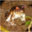

In [ ]:
X_train[0]

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

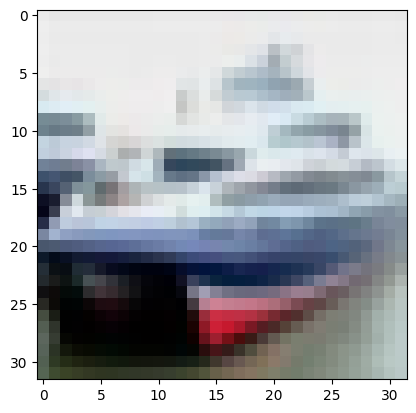

In [ ]:
plt.imshow(X_test[1])

## Step 4: Building the Convolutional Neural Network (CNN)

### Adding the First Convolutional Layer
Defining the model and hyperparameters for the convolutional layer:
*   Filters: 32
*   Kernel size: 3
*   Padding: same
*   Activation function: ReLU
*   Input shape: (32, 32, 3)
    

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),  # Define the input shape separately
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    # Add more layers as needed
])

### Adding the Second Convolutional Layer and Max-Pooling Layer

Hyperparameters of the Convolutional Layer:
- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu

Hyperparameters of the Max-Pooling Layer:
- pool_size: 2
- strides: 2
- padding: valid

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Third Convolutional Layer

For the third convolutional layer, the hyperparameters are:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth convolutional layer and the max pooling layer

Hyperparameters of the convolutional layer:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

Hyperparameters of the max pooling layer:

    pool_size: 2
    strides: 2
    padding: valid

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [ ]:
model.add(tf.keras.layers.Flatten())

## Adding the first dense (fully-connected) layer

Hyperparameters of the dense layer:

*   units/neurons: 128
*   activation function: relu

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Adding the output layer

Hyperparameters of the output layer:

*   units/neurons: 10 (number of classes)
*   activation: softmax

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [ ]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([3], dtype=uint8)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 251s 158ms/step - loss: 1.6345 - sparse_categorical_accuracy: 0.3981
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 241s 154ms/step - loss: 0.9624 - sparse_categorical_accuracy: 0.6613
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 244s 156ms/step - loss: 0.7537 - sparse_categorical_accuracy: 0.7355
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 241s 154ms/step - loss: 0.6103 - sparse_categorical_accuracy: 0.7850
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 243s 155ms/step - loss: 0.4944 - sparse_categorical_accuracy: 0.8260


### Evaluating the model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - loss: 0.8074 - sparse_categorical_accuracy: 0.7394


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7408999800682068


In [ ]:
test_loss

0.8018717765808105